In [1]:
import warnings
warnings.filterwarnings('ignore')

import gc
import re
import string
import operator
from collections import defaultdict

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

# import tokenization
# from wordcloud import STOPWORDS

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
# import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback

SEED = 1337

print(1)

1


In [15]:
df_train = pd.read_csv('./ds/train.csv', dtype={'id': np.int16, 'target': np.int8})
df_test = pd.read_csv('./ds/test.csv', dtype={'id': np.int16})

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (9473201, 9)
Training Set Memory Usage = 650.47 MB
Test Set Shape = (4086511, 8)
Test Set Memory Usage = 249.42 MB


In [17]:
#Print the first 5 rows of the dataframe.
df_train.head()

,x,y,z,t,terror,q,flag,event_id,hit_id
0,-142.5,-147.5,0,767.8790,2.02966,1.050520,0,7,1
1,-137.5,-152.5,0,-70.5552,2.02966,0.999853,0,7,2
2,-137.5,-132.5,0,-837.8410,1.85146,2.052540,0,7,3
3,-142.5,-117.5,0,-973.1950,1.39994,19.513100,0,7,4
4,-137.5,-117.5,0,-159.1400,2.02966,0.800334,0,7,5


In [ ]:
df_train.info(verbose=True)

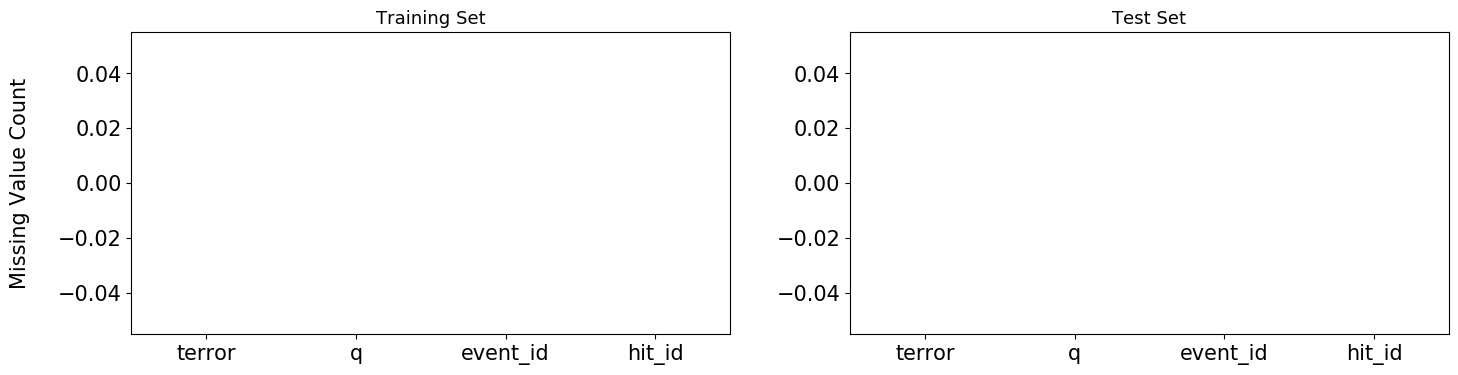

In [7]:
missing_cols = ['terror', 'q','event_id','hit_id']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=df_train[missing_cols].isnull().sum().index, y=df_train[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=df_test[missing_cols].isnull().sum().index, y=df_test[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

for df in [df_train, df_test]:
    for col in missing_cols:
        df[col] = df[col].fillna(f'no_{col}')

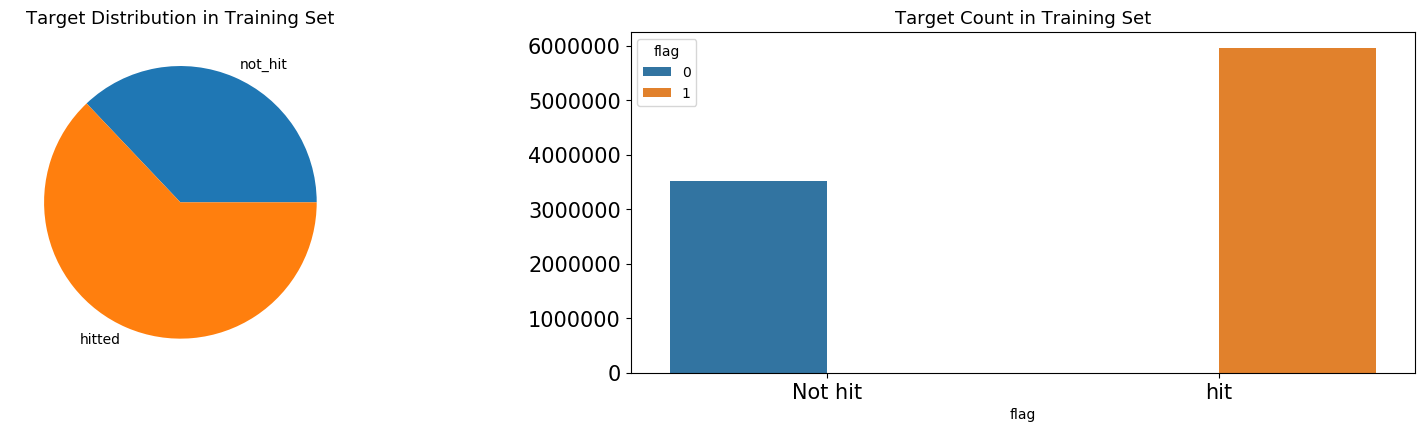

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

df_train.groupby('flag').count()['hit_id'].plot(kind='pie', ax=axes[0], labels=['not_hit', 'hitted'])
sns.countplot(x=df_train['flag'], hue=df_train['flag'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not hit', 'hit'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()